In [5]:
import pandas as pd
import scipy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.ExcelFile("Obes-phys-acti-diet-eng-2014-tab.xls")

In [7]:
print(data.sheet_names)

['Chapter 7', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.10']


# Cleanup of the data

In [8]:
#Read 2nd section, by age. Here we have removed data consisting in the top 4 rows and last 14 rows.  
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)
print(data_age)

   Unnamed: 0    Total  Under 16  16-24   25-34   35-44   45-54   55-64  \
0         NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN   
1     2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   
2     2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   
3     2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   
4     2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   
5     2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0   
6     2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0   
7     2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0   
8     2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0   
9     2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0   
10    2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0   
11    2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0   

    65-74  75 and over  

In [9]:
#Rename unnamed to year
data_age.rename(columns={u'Unnamed: 0':u'Year'}, inplace = True)

In [10]:
#drop empties
data_age.dropna(inplace = True)

In [11]:
data_age.set_index('Year',inplace=True)

In [12]:
print("After Clean up")
print(data_age)

After Clean up
           Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
Year                                                                       
2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0 

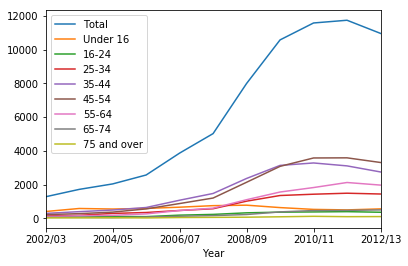

In [13]:
data_age.plot()
plt.show()

In [14]:
#Drop the total column and plot
data_age_minus_total = data_age.drop('Total',axis=1)

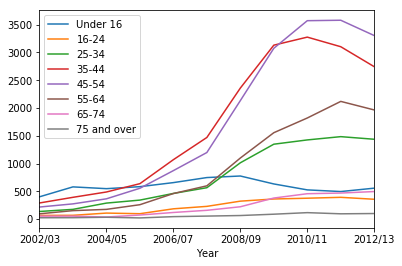

In [15]:
data_age_minus_total.plot()
plt.show()

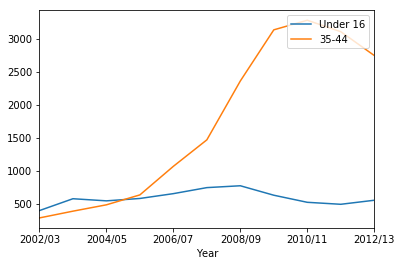

In [16]:
plt.close()

#Plot Children vs Adults
data_age['Under 16'].plot(label='Under 16')
data_age['35-44'].plot(label="35-44")
plt.legend(loc='upper right')
plt.show()

In [17]:
#Predicting whether the England's children will get fatter in the future
kids_values = data_age['Under 16'].values
x_axis = range(len(kids_values))
kids_values

array([400., 579., 547., 583., 656., 747., 775., 632., 525., 495., 556.])

In [18]:
poly_degree = 4
curve_fit = np.polyfit(x_axis, kids_values, poly_degree)
poly_interp = np.poly1d(curve_fit)

In [19]:

poly_fit_values = []

for i in range(len(x_axis)):
    poly_fit_values.append(poly_interp(i))

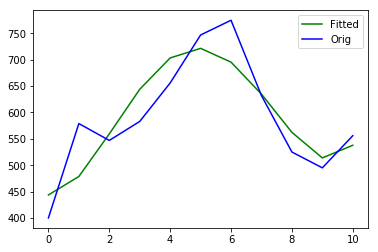

In [21]:
plt.plot(x_axis,poly_fit_values,'-g',label = "Fitted")
plt.plot(x_axis, kids_values, '-b',label = "Orig")

plt.legend(loc = "upper right")
plt.show()
plt.close()

In [22]:
plt.plot(x_axis,kids_values,"-b",label = "Orig")

In [23]:
x_axis2 = range(15)

In [24]:
poly_fit_values = []
for i in range(len(x_axis2)):
    poly_fit_values.append(poly_interp(i))

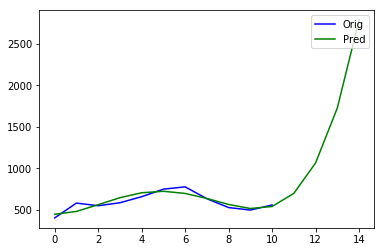

In [25]:
plt.plot(x_axis2,poly_fit_values,"-g",label="Pred")
plt.legend(loc="upper right")
plt.show()